# Nueva sesión de testing 

## Esta vez trataremos un csv que contiene datos de sesiones de usuarios, visualizaciones de pantalla y total de eventos.
## Simplemente es un archivo para hacer pruebas y el objetivo será aplicar un algoritmo de aprendizaje no supervisado (clustering) para detectar sesiones atípicas.

Usaremos python y más adelante repetiremos el proceso con pyspark

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use("ggplot")

In [14]:
df = pd.read_csv('./screenViewsAndTotalEvents.csv', index_col=0)

In [15]:
df.head()

,Visualizaciones de pantalla,Total de eventos
Session Id,,
1505755687157,179,178
1506093196536,168,126
1505717973545,165,165
1506098923333,144,29
1506077834275,134,106


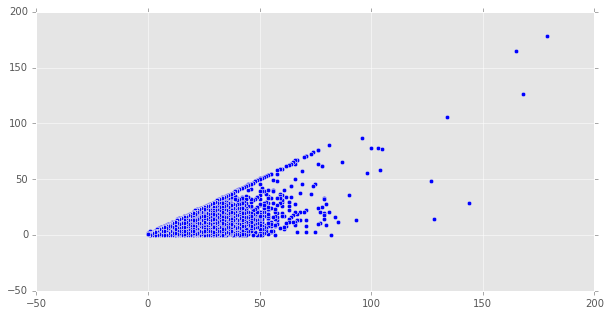

In [16]:
#ahora vamos a pintarlo. 

f, ax = plt.subplots(figsize = (10,5))
plt.scatter(df['Visualizaciones de pantalla'],df['Total de eventos'])

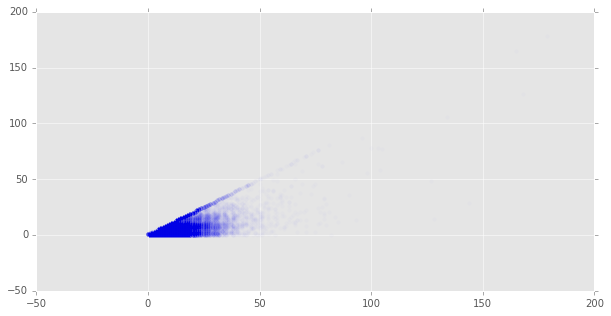

In [21]:
f, ax = plt.subplots(figsize = (10,5))
plt.scatter(df['Visualizaciones de pantalla'],df['Total de eventos'], alpha=0.01)

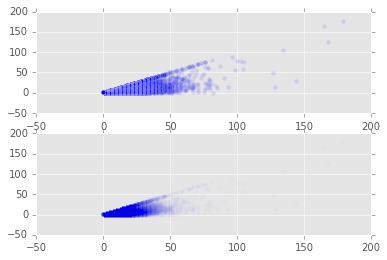

In [22]:
f, (ax1,ax2) = plt.subplots(nrows=2, sharey=True)

ax1.scatter(df['Visualizaciones de pantalla'],df['Total de eventos'],alpha=0.1)
ax2.scatter(df['Visualizaciones de pantalla'],df['Total de eventos'],alpha=0.01)

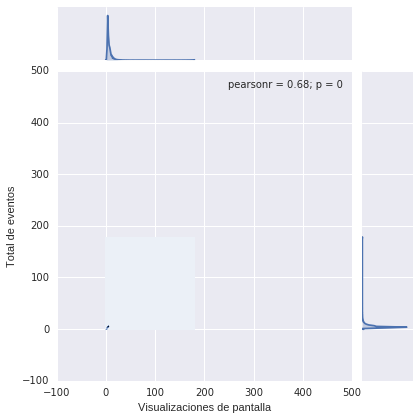

In [23]:
import seaborn as sns

(sns.jointplot(x="Visualizaciones de pantalla",y="Total de eventos",
               data=df,kind="kde",xlim=(-100,500),ylim=(-100,500)))

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans()

In [26]:
type(df)

pandas.core.frame.DataFrame

In [27]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
kmeans.cluster_centers_

array([[  1.39750089,   0.23661242],
       [ 15.9750465 ,  12.80626162],
       [  5.93684132,   0.61164488],
       [ 27.10901468,   7.098233  ],
       [ 13.10928703,   2.4644106 ],
       [  2.94581856,   2.34455903],
       [  7.33239893,   5.85608812],
       [ 45.70662906,  29.80535966]])

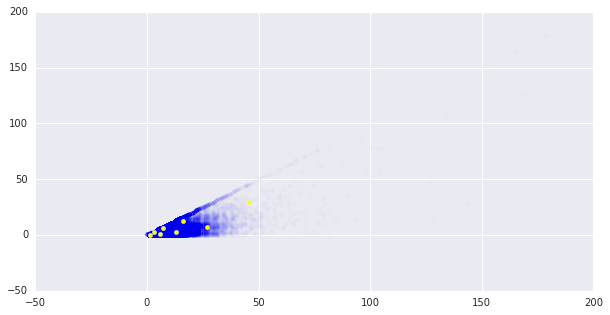

In [29]:
f, ax = plt.subplots(figsize = (10,5))
plt.scatter(df['Visualizaciones de pantalla'],df['Total de eventos'],alpha=0.01)
plt.scatter(*zip(*kmeans.cluster_centers_),c="yellow")

In [30]:
# Cuantos cluster elegimos?
# Kmeans elige por defecto 8, pero podemos decidirlo nosotros

In [33]:
ks = range (1,15)
fits = [KMeans(n_clusters=k).fit(df) for k in ks]
centroids = [kmeans.cluster_centers_ for kmeans in fits]

In [34]:
centroids

[array([[ 3.74409358,  1.46828191]]), array([[  2.6736314 ,   0.96121449],
        [ 14.86422232,   6.73577768]]), array([[  2.10035912,   0.72401005],
        [  8.88855805,   3.64333541],
        [ 24.25793318,  12.00431086]]), array([[  1.75827782,   0.61200969],
        [ 14.60690848,   6.53356687],
        [ 33.18421053,  17.65931721],
        [  6.43617819,   2.4130129 ]]), array([[  1.50730006,   0.45228836],
        [ 10.13139908,   4.63218138],
        [ 42.47951583,  24.75791434],
        [ 20.28732394,   9.28408972],
        [  4.87155899,   1.79505113]]), array([[  1.68695845,   0.47481955],
        [ 12.8398818 ,   5.60644536],
        [  4.64753911,   3.91827547],
        [ 23.31034483,  10.96650246],
        [  7.09114549,   0.75985687],
        [ 46.4939759 ,  27.81659973]]), array([[  4.35491308,   2.692089  ],
        [ 54.99193548,  34.21505376],
        [ 10.24797844,   8.08168288],
        [  1.61861417,   0.43188127],
        [ 26.97688204,  15.20835803],
        

In [37]:
from scipy.spatial.distance import cdist

dists_centroids = [cdist(df, centers, 'euclidean') for centers in centroids]

In [38]:
[x.shape for x in dists_centroids]

[(391354, 1),
 (391354, 2),
 (391354, 3),
 (391354, 4),
 (391354, 5),
 (391354, 6),
 (391354, 7),
 (391354, 8),
 (391354, 9),
 (391354, 10),
 (391354, 11),
 (391354, 12),
 (391354, 13),
 (391354, 14)]

In [39]:
import numpy as np

In [40]:
np.min(dists_centroids[2], axis=1).shape

(391354,)

In [41]:
dists = [np.average(np.min(fit, axis=1)) for fit in dists_centroids]

In [42]:
dists

[3.5064760894199996,
 2.5572642363584031,
 2.0853151443693978,
 1.8274511813241716,
 1.6557908529695551,
 1.5465541237426046,
 1.4766006459009715,
 1.2621094352933229,
 1.2797396700174748,
 1.0816084493186855,
 1.0590069395485155,
 1.0634036182744306,
 0.98727973667932079,
 0.99477640413420632]

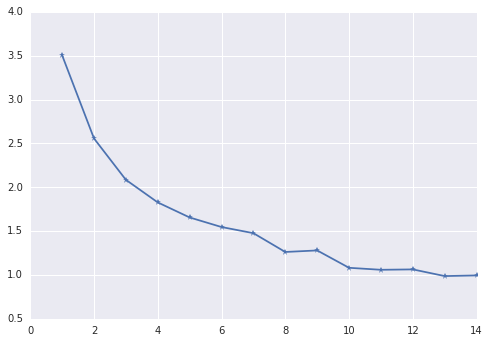

In [43]:
plt.plot(ks, dists, '-*')

In [45]:
kmeans2 = KMeans(n_clusters=5)
kmeans2.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

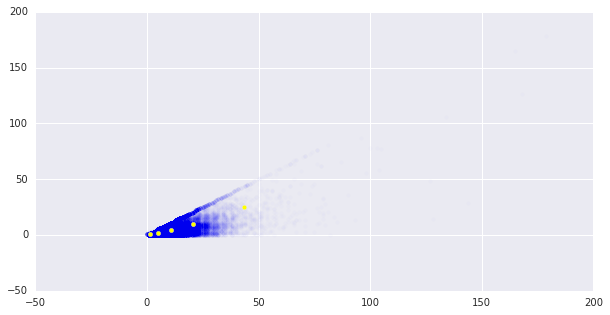

In [46]:
f, ax = plt.subplots(figsize = (10,5))
plt.scatter(df['Visualizaciones de pantalla'],df['Total de eventos'],alpha=0.01)
plt.scatter(*zip(*kmeans2.cluster_centers_),c="yellow")

In [49]:
fits[4]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [50]:
model_5_clusters = fits[4]
predictions = model_5_clusters.predict(df)

In [51]:
predictions

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [52]:
xs = df.values[:,0]
ys = df.values[:,1]

In [53]:
xs.shape

(391354,)

In [54]:
df2 = pd.DataFrame({'Visualizaciones de pantalla': xs, 'Total de eventos': ys, 'cluster': predictions})

In [55]:
cluster_stats = df2.groupby('cluster')['Visualizaciones de pantalla','Total de eventos'].agg(['mean','std'])

In [56]:
merged = df2.merge(cluster_stats, left_on='cluster', right_index=True)
merged.head()

/home/dsc/anaconda2/lib/python2.7/site-packages/pandas/core/reshape/merge.py:551: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,Total de eventos,Visualizaciones de pantalla,cluster,"(Visualizaciones de pantalla, mean)","(Visualizaciones de pantalla, std)","(Total de eventos, mean)","(Total de eventos, std)"
0,178,179,2,42.479516,15.421873,24.757914,15.320407
1,126,168,2,42.479516,15.421873,24.757914,15.320407
2,165,165,2,42.479516,15.421873,24.757914,15.320407
3,29,144,2,42.479516,15.421873,24.757914,15.320407
4,106,134,2,42.479516,15.421873,24.757914,15.320407


In [57]:
merged['visualizaciones_zscore'] = ((merged['Visualizaciones de pantalla'] -
                                     merged[('Visualizaciones de pantalla', 'mean')]) / 
                                     merged[('Visualizaciones de pantalla', 'std')])

merged['Eventos_zscore'] = ((merged['Total de eventos'] -
                             merged[('Total de eventos','mean')]) /
                             merged[('Total de eventos','std')])
merged.sample(10)

,Total de eventos,Visualizaciones de pantalla,cluster,"(Visualizaciones de pantalla, mean)","(Visualizaciones de pantalla, std)","(Total de eventos, mean)","(Total de eventos, std)",visualizaciones_zscore,Eventos_zscore
345966,0,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,-0.660092
218931,0,2,0,1.507300,0.679902,0.452288,0.685190,0.724663,-0.660092
240174,1,2,0,1.507300,0.679902,0.452288,0.685190,0.724663,0.799357
282581,1,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,0.799357
286232,0,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,-0.660092
71894,6,6,1,10.131399,2.680364,4.632181,3.059997,-1.541357,0.447000
25645,10,10,1,10.131399,2.680364,4.632181,3.059997,-0.049023,1.754191
304359,0,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,-0.660092
15186,2,13,1,10.131399,2.680364,4.632181,3.059997,1.070228,-0.860191
192523,0,2,0,1.507300,0.679902,0.452288,0.685190,0.724663,-0.660092


In [58]:
merged['zscore'] = np.sqrt(merged['visualizaciones_zscore'] ** 2 + merged['Eventos_zscore']**2)

In [59]:
merged.sample(10)

,Total de eventos,Visualizaciones de pantalla,cluster,"(Visualizaciones de pantalla, mean)","(Visualizaciones de pantalla, std)","(Total de eventos, mean)","(Total de eventos, std)",visualizaciones_zscore,Eventos_zscore,zscore
356100,0,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,-0.660092,0.996214
123433,1,4,4,4.871559,1.568122,1.795051,1.603836,-0.555798,-0.495719,0.744747
307500,0,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,-0.660092,0.996214
169033,3,3,4,4.871559,1.568122,1.795051,1.603836,-1.193503,0.751292,1.410280
321482,0,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,-0.660092,0.996214
188632,2,2,0,1.507300,0.679902,0.452288,0.685190,0.724663,2.258807,2.372203
307747,0,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,-0.660092,0.996214
384136,0,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,-0.660092,0.996214
294202,0,1,0,1.507300,0.679902,0.452288,0.685190,-0.746137,-0.660092,0.996214
132027,2,3,4,4.871559,1.568122,1.795051,1.603836,-1.193503,0.127787,1.200325


In [62]:
merged['outlier'] =  merged['zscore']>3
sum(merged['outlier'])

281

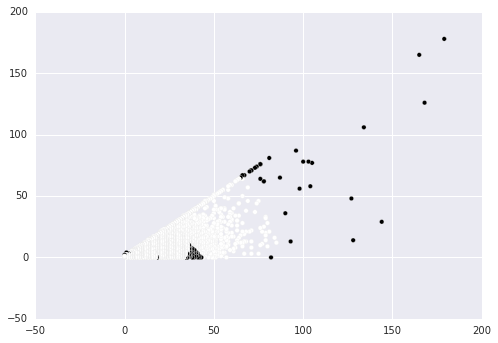

In [63]:
plt.scatter(merged['Visualizaciones de pantalla'],merged['Total de eventos'], c=merged['outlier'])

# NUEVA SESIÓN!

## Como prometí esta vez usaré pyspark

In [1]:
sc

In [2]:
f = sc.textFile('../../Archivos_tfm/dataTesting/screenViewsAndTotalEvents.csv')

In [3]:
f.take(3)

[u'Session Id,Visualizaciones de pantalla,Total de eventos',
 u'1505755687157,179,178',
 u'1506093196536,168,126']

In [6]:
# Creamos una función que nos separa cada columna y convierta las columnas que nos
# interesan en formato float
def splitAndFloat (row, delim = ','):
    """
    :param row: sesión de entrada como un string separado por comas
    :return una lista con id de sesiín y duración de la sesión en segundos.
    
    """
    
    out = row.split(delim)
    return [float(out[1]),float(out[2])]

# También necesitamos asignar el header a una variable para luego hacer un filter
# Y poder prescindir de él.

header = f.first()

In [7]:
data = f.filter(lambda line: line != header).map(splitAndFloat)

In [8]:
data.first()

[179.0, 178.0]

In [9]:
# Importamos la librería para hacer clustering
from pyspark.mllib.clustering import KMeans

In [10]:
# Esta vez elegiremos 4 clusters
clusters = KMeans.train(data,4)

In [11]:
clusters.centers

[array([ 1.86394212,  0.61315666]),
 array([ 34.98314856,  19.42350333]),
 array([ 15.77916492,   6.91318716]),
 array([ 6.88692485,  2.79745197])]

In [12]:
clusters.predict(sc.parallelize([[200,100]])).collect()

[1]

In [15]:
clusters.predict(sc.parallelize([[6,2]])).collect()

[3]

In [16]:
# Ahora escribimos otra función que anotará cada punto con el cluster al que pertence en la forma (key, value),
# que nos permitirá hacer groupByKey() y luego sumarizar cada cluster con mapValues.

In [21]:
from math import sqrt
import numpy as np

def annotate_with_cluster(point):
    visualizaciones, eventos = point
    
    
    distances = ([sqrt(
                        (visualizaciones - visualizaciones_centroid)**2 +
                        (eventos - eventos_centroid)**2)
                  for visualizaciones_centroid, eventos_centroid in clusters.centers]
                )
    cluster = distances.index(min(distances))
    
    return (cluster, point)

In [22]:
annotate_with_cluster(np.array([2.5,8.5]))

(3, array([ 2.5,  8.5]))

In [23]:
points_with_cluster = data.map(annotate_with_cluster)
points_with_cluster

PythonRDD[90] at RDD at PythonRDD.scala:48

In [24]:
def stats (iterable):
    views, events = zip(*iterable)
    return np.mean(views), np.std(views), np.mean(events), np.std(events)

In [25]:
groups = points_with_cluster.groupByKey().mapValues(stats)

In [26]:
clusterdict = dict(groups.collect())

In [27]:
# Por ultimo, anotamos cada punt con su valor de outlier:
# True si está a más de 3 stds de la media y False si no.

In [28]:
def outlier(annotated_point):
    cluster, (views, events) = annotated_point
    this_views_mean, this_views_std, this_events_mean, this_events_std = clusterdict[cluster]
    
    zscore_views = (views - this_views_mean) / this_views_std
    zscore_events = (events - this_events_mean) / this_events_std
    
    zscore_squared = zscore_views ** 2 + zscore_events ** 2
    outlier = zscore_squared > 9
    return outlier, views, events

In [30]:
points_with_cluster.map(outlier).take(150)

[(True, 179.0, 178.0),
 (True, 168.0, 126.0),
 (True, 165.0, 165.0),
 (True, 144.0, 29.0),
 (True, 134.0, 106.0),
 (True, 128.0, 14.0),
 (True, 127.0, 48.0),
 (True, 105.0, 77.0),
 (True, 104.0, 58.0),
 (True, 103.0, 78.0),
 (True, 100.0, 78.0),
 (True, 98.0, 56.0),
 (True, 96.0, 87.0),
 (True, 93.0, 13.0),
 (True, 90.0, 36.0),
 (True, 87.0, 65.0),
 (True, 85.0, 12.0),
 (True, 84.0, 16.0),
 (True, 82.0, 0.0),
 (True, 81.0, 81.0),
 (True, 81.0, 21.0),
 (True, 80.0, 28.0),
 (True, 80.0, 9.0),
 (True, 79.0, 20.0),
 (True, 79.0, 14.0),
 (True, 79.0, 18.0),
 (True, 79.0, 33.0),
 (True, 79.0, 32.0),
 (True, 78.0, 25.0),
 (True, 78.0, 62.0),
 (True, 78.0, 62.0),
 (True, 77.0, 11.0),
 (True, 77.0, 21.0),
 (True, 76.0, 76.0),
 (True, 76.0, 76.0),
 (True, 76.0, 76.0),
 (True, 76.0, 64.0),
 (True, 76.0, 24.0),
 (True, 76.0, 10.0),
 (True, 75.0, 3.0),
 (True, 75.0, 46.0),
 (True, 74.0, 74.0),
 (True, 74.0, 44.0),
 (True, 73.0, 37.0),
 (True, 73.0, 73.0),
 (True, 71.0, 71.0),
 (False, 71.0, 8.0),
 

In [31]:
points_with_cluster.map(outlier).filter(lambda x: x[0]).take(150)

[(True, 179.0, 178.0),
 (True, 168.0, 126.0),
 (True, 165.0, 165.0),
 (True, 144.0, 29.0),
 (True, 134.0, 106.0),
 (True, 128.0, 14.0),
 (True, 127.0, 48.0),
 (True, 105.0, 77.0),
 (True, 104.0, 58.0),
 (True, 103.0, 78.0),
 (True, 100.0, 78.0),
 (True, 98.0, 56.0),
 (True, 96.0, 87.0),
 (True, 93.0, 13.0),
 (True, 90.0, 36.0),
 (True, 87.0, 65.0),
 (True, 85.0, 12.0),
 (True, 84.0, 16.0),
 (True, 82.0, 0.0),
 (True, 81.0, 81.0),
 (True, 81.0, 21.0),
 (True, 80.0, 28.0),
 (True, 80.0, 9.0),
 (True, 79.0, 20.0),
 (True, 79.0, 14.0),
 (True, 79.0, 18.0),
 (True, 79.0, 33.0),
 (True, 79.0, 32.0),
 (True, 78.0, 25.0),
 (True, 78.0, 62.0),
 (True, 78.0, 62.0),
 (True, 77.0, 11.0),
 (True, 77.0, 21.0),
 (True, 76.0, 76.0),
 (True, 76.0, 76.0),
 (True, 76.0, 76.0),
 (True, 76.0, 64.0),
 (True, 76.0, 24.0),
 (True, 76.0, 10.0),
 (True, 75.0, 3.0),
 (True, 75.0, 46.0),
 (True, 74.0, 74.0),
 (True, 74.0, 44.0),
 (True, 73.0, 37.0),
 (True, 73.0, 73.0),
 (True, 71.0, 71.0),
 (True, 71.0, 71.0),
 

# Retomo este notebook para hacer clustering con el dataframe de prueba

## Primero con python
## Antes vamos a hacer reduccuión de dimensionalidad

In [ ]:
dd = pd.read_csv('../../Archivos_tfm/dataTesting/df_prueba.csv', index_col=0)
dd.head()

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from sklearn.decomposition import pca

In [ ]:
model = pca.PCA(n_components=2)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use("ggplot")
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
from sklearn import preprocessing

In [3]:
dd = pd.read_csv('../../Archivos_tfm/dataTesting/df_prueba.csv', index_col=0)
print dd.mean()
print dd.std()

Profundidad                         2.419365
sesiones                           27.005618
visualizaciones                   342.578123
visualizacionesUnicas             114.296365
duracionMediaSesion               269.385578
visualizacionesPorSesion           15.173480
visualizacionesUnicasPorSesion      4.886850
avgTimePage1                       16.241885
avgTimePage2                        4.699507
avgTimePage3                        7.363760
avgTimeInTheProcess                28.305153
avgTimeOutOfTheProcess            241.080425
visitsToTheProcess                  2.041837
uniqueVisitsToTheProcess            1.485592
visitsPage2                         0.876206
uniqueVisitsPage2                   0.718638
visitsPage3                         0.846332
uniqueVisitsPage3                   0.626966
Errores                             0.071844
Y                                   0.439788
dtype: float64
Profundidad                         1.444323
sesiones                           24.92

In [4]:
dd.describe()

,Profundidad,sesiones,visualizaciones,visualizacionesUnicas,duracionMediaSesion,visualizacionesPorSesion,visualizacionesUnicasPorSesion,avgTimePage1,avgTimePage2,avgTimePage3,avgTimeInTheProcess,avgTimeOutOfTheProcess,visitsToTheProcess,uniqueVisitsToTheProcess,visitsPage2,uniqueVisitsPage2,visitsPage3,uniqueVisitsPage3,Errores,Y
count,15130.000000,15130.000000,15130.000000,15130.000000,15130.000000,15130.000000,15130.000000,15130.000000,15130.000000,15130.000000,15130.000000,15130.000000,15130.000000,15130.000000,15130.000000,15130.000000,15130.000000,15130.000000,15130.000000,15130.000000
mean,2.419365,27.005618,342.578123,114.296365,269.385578,15.173480,4.886850,16.241885,4.699507,7.363760,28.305153,241.080425,2.041837,1.485592,0.876206,0.718638,0.846332,0.626966,0.071844,0.439788
std,1.444323,24.923961,310.512588,92.576638,230.198191,7.829167,1.728899,41.844607,19.893883,17.886904,51.358769,232.835860,2.364533,1.313590,1.347072,0.943133,1.880559,0.897651,0.561912,0.496378
min,1.000000,1.000000,9.000000,4.000000,18.000000,4.450000,2.266667,0.333333,0.000000,0.000000,0.500000,-1406.656250,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,10.000000,156.000000,52.000000,138.383102,10.550000,3.789686,6.000000,0.000000,0.000000,8.000000,113.112331,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,20.000000,266.000000,90.000000,213.122500,13.307692,4.500000,10.000000,2.000000,0.000000,20.633333,187.041290,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,35.000000,436.000000,148.000000,328.821044,17.387821,5.500000,17.000000,6.000000,11.000000,34.000000,302.750000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,4.000000,249.000000,9674.000000,1004.000000,5620.042254,202.000000,37.000000,1548.000000,1027.000000,671.500000,1548.000000,5612.042254,61.000000,42.000000,57.000000,28.000000,127.000000,28.000000,24.000000,1.000000


In [14]:
dd_cluster = dd[['avgTimePage2','uniqueVisitsPage3']]

In [15]:
dd_cluster

,avgTimePage2,uniqueVisitsPage3
0,0.000000,0.0
1,0.000000,0.0
2,7.333333,1.0
3,5.000000,1.0
4,0.000000,0.0
5,12.888889,1.0
6,0.000000,0.0
7,11.000000,1.0
8,8.500000,1.0
9,4.000000,1.0


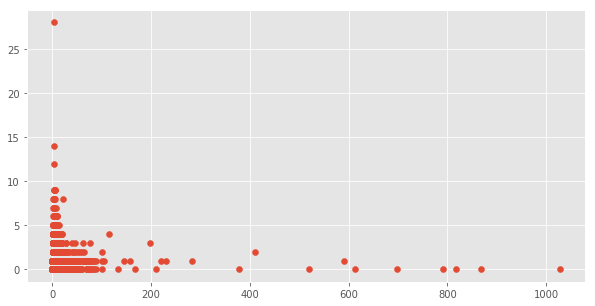

In [17]:
f, ax = plt.subplots(figsize = (10,5))
plt.scatter(dd['avgTimePage2'],dd['uniqueVisitsPage3'])

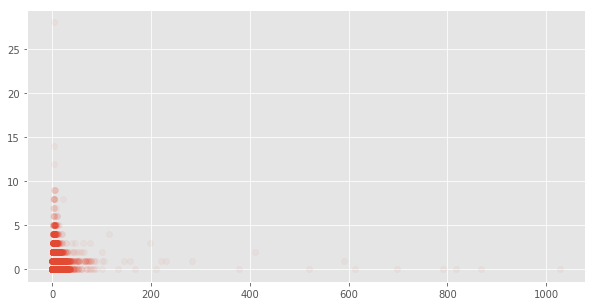

In [20]:
f, ax = plt.subplots(figsize = (10,5))
plt.scatter(dd['avgTimePage2'],dd['uniqueVisitsPage3'], alpha=0.05)

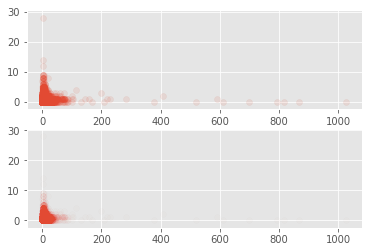

In [21]:
f, (ax1,ax2) = plt.subplots(nrows=2, sharey=True)

ax1.scatter(dd['avgTimePage2'],dd['uniqueVisitsPage3'], alpha = 0.1)
ax2.scatter(dd['avgTimePage2'],dd['uniqueVisitsPage3'], alpha = 0.01)

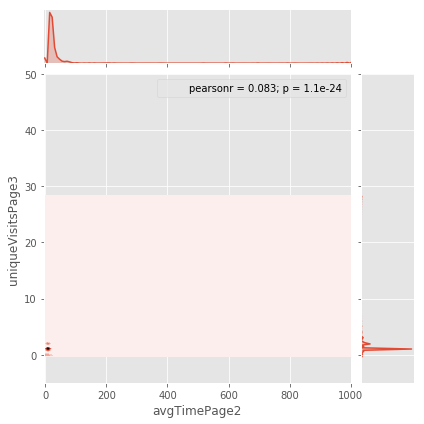

In [26]:
(sns.jointplot(x="avgTimePage2",y="uniqueVisitsPage3",
               data=dd,kind="kde",xlim=(-5,1000),ylim=(-5,50)))

In [28]:
kmeans = KMeans()
kmeans.fit(dd_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
kmeans.cluster_centers_

array([[  4.94561442e-01,   2.75133428e-01],
       [  6.05208333e+02,   2.50000000e-01],
       [  6.00829966e+01,   8.18181818e-01],
       [  2.05370433e+01,   7.00223714e-01],
       [  3.56722222e+02,   1.00000000e+00],
       [  6.84649495e+00,   1.26433057e+00],
       [  8.75625000e+02,   0.00000000e+00],
       [  1.82500000e+02,   8.75000000e-01]])

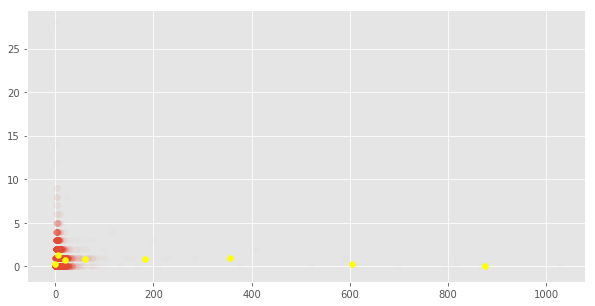

In [30]:
f, ax = plt.subplots(figsize = (10,5))
plt.scatter(dd_cluster['avgTimePage2'],dd_cluster['uniqueVisitsPage3'],alpha=0.01)
plt.scatter(*zip(*kmeans.cluster_centers_),c="yellow")

In [31]:
# Cuantos cluster elegimos?
# Kmeans elige por defecto 8, pero podemos decidirlo nosotros
ks = range (1,15)
fits = [KMeans(n_clusters=k).fit(dd_cluster) for k in ks]
centroids = [kmeans.cluster_centers_ for kmeans in fits]

In [32]:
dists_centroids = [cdist(dd_cluster, centers, 'euclidean') for centers in centroids]
[x.shape for x in dists_centroids]

[(15130, 1),
 (15130, 2),
 (15130, 3),
 (15130, 4),
 (15130, 5),
 (15130, 6),
 (15130, 7),
 (15130, 8),
 (15130, 9),
 (15130, 10),
 (15130, 11),
 (15130, 12),
 (15130, 13),
 (15130, 14)]

In [33]:
dists = [np.average(np.min(fit, axis=1)) for fit in dists_centroids]

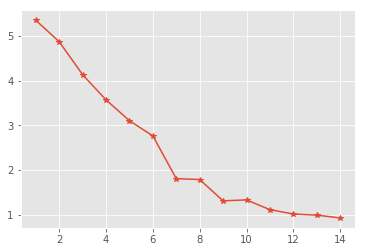

In [34]:
plt.plot(ks, dists, '-*')

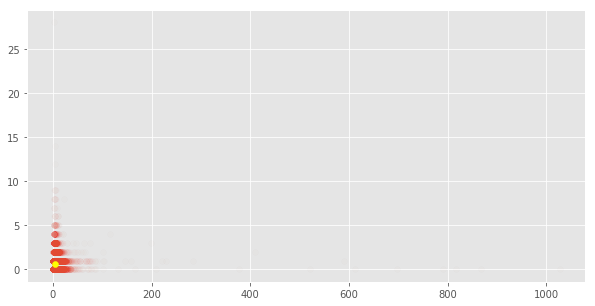

In [38]:
kmeans2 = KMeans(n_clusters=1)
kmeans2.fit(dd_cluster)
f, ax = plt.subplots(figsize = (10,5))
plt.scatter(dd_cluster['avgTimePage2'],dd_cluster['uniqueVisitsPage3'],alpha=0.01)
plt.scatter(*zip(*kmeans2.cluster_centers_),c="yellow")